In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)  
CustomerId — идентификатор клиента  
Surname — фамилия клиента  
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)  
Geography — страна клиента (банк международный)  
Gender — пол клиента  
Age — возраст клиента  
Tenure — сколько лет клиент пользуется услугами банка  
Balance — баланс на счетах клиента в банке  
NumOfProducts — количество услуг банка, которые приобрёл клиент  
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)  
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)  
EstimatedSalary — предполагаемая заработная плата клиента  
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)  

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

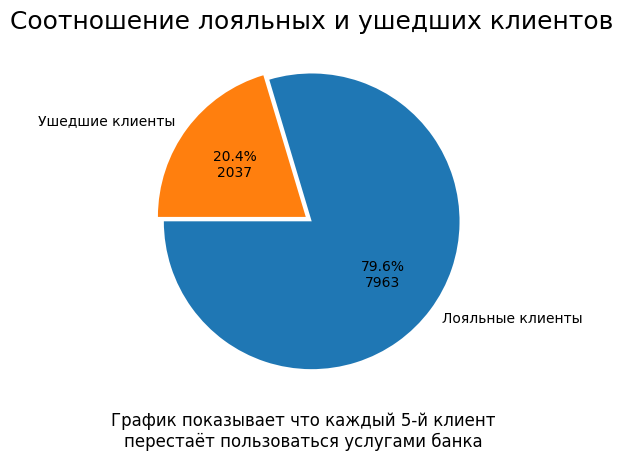

In [3]:
churn_counts = churn_data['Exited'].value_counts()

plt.pie(churn_counts, 
        labels=['Лояльные клиенты', 'Ушедшие клиенты'],
        # x это процент, умножаем на общее количество клиентов
        autopct=lambda x: f'{x:.1f}%\n{churn_counts.sum()*x / 100:.0f}',
        startangle=180,
        explode=(0, 0.05)
)

plt.title('Соотношение лояльных и ушедших клиентов', fontsize=18)
plt.suptitle(f'График показывает что каждый {churn_counts.sum()/churn_counts[1]:.0f}-й клиент\nперестаёт пользоваться услугами банка', y=0.1)

plt.show()

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

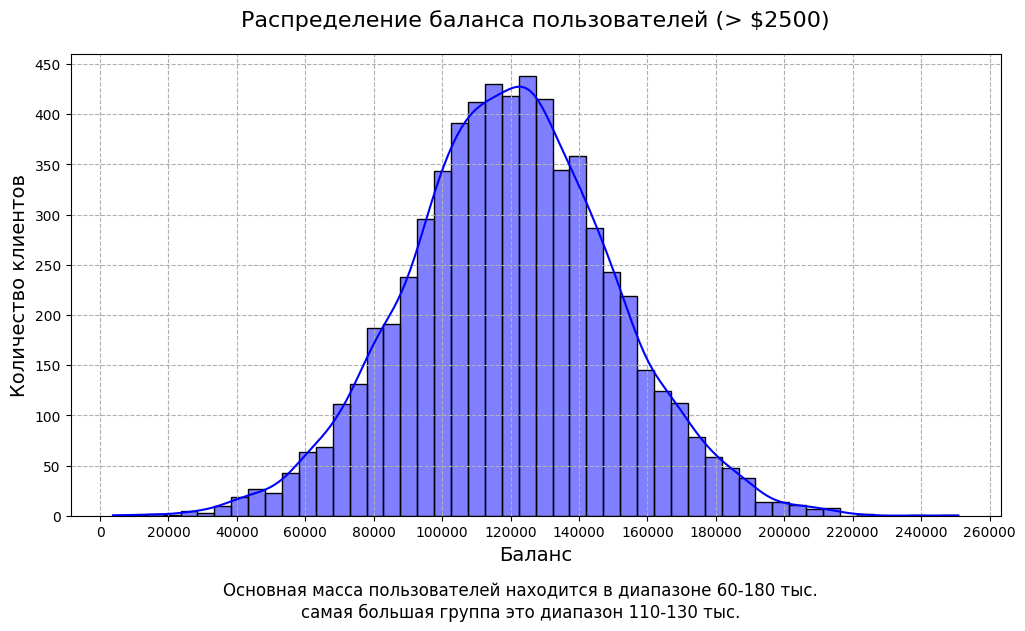

In [4]:
filter_df = churn_data[churn_data['Balance'] > 2500]

plt.figure(figsize=(12, 6))

sns.histplot(filter_df['Balance'], bins=50, color='blue', kde=True)

plt.xticks(range(0, int(filter_df['Balance'].max()) + 20000, 20000))
plt.yticks(range(0, 500, 50))

plt.title('Распределение баланса пользователей (> $2500)', fontsize=16, pad=20)

plt.suptitle(
'''Основная масса пользователей находится в диапазоне 60-180 тыс.
самая большая группа это диапазон 110-130 тыс.''',
y=0)

plt.xlabel('Баланс', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)
plt.grid(linestyle='--')

plt.show()

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

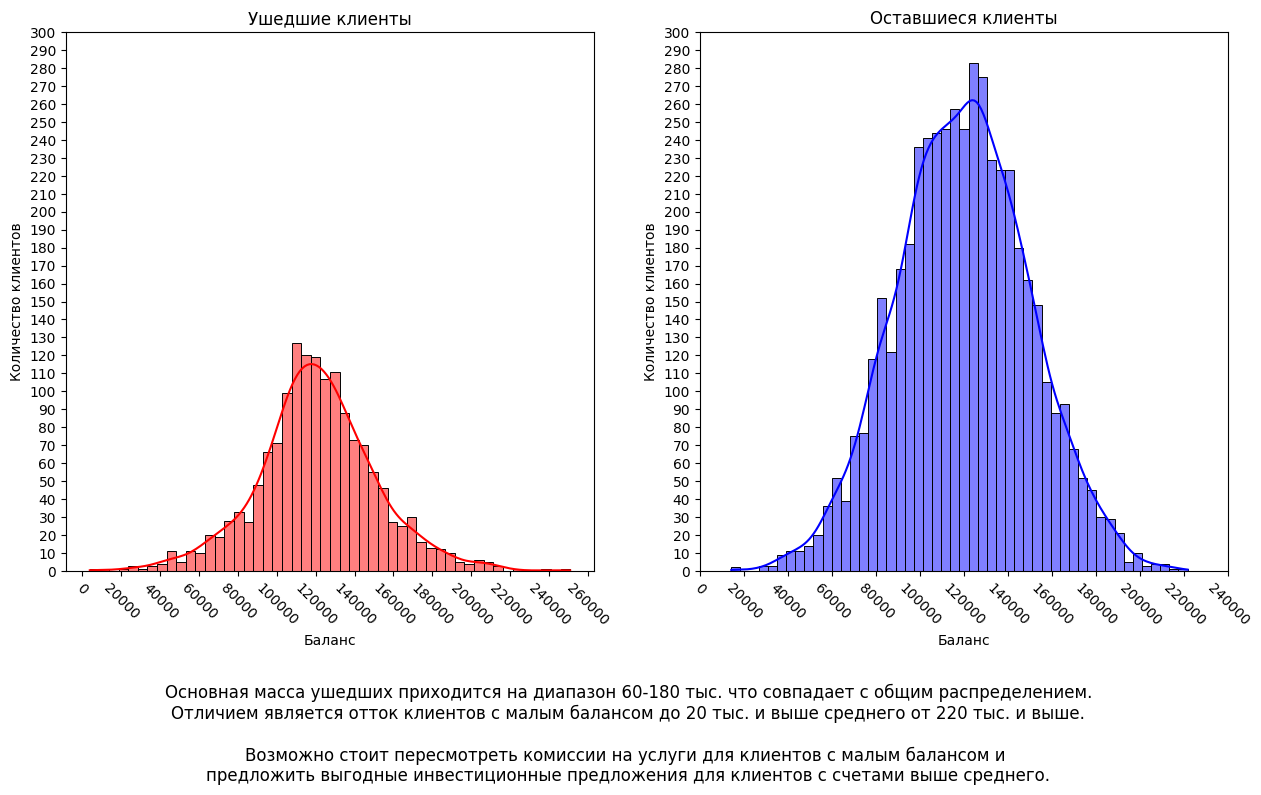

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Ушедшие клиенты
filter_df_left = churn_data[(churn_data['Exited'] == 1) & (churn_data['Balance'] > 2500)]
sns.histplot(filter_df_left['Balance'], bins=50, color='red', kde=True, ax=axes[0])
axes[0].set_xticks(range(0, int(filter_df_left['Balance'].max()) + 20000, 20000))
axes[0].set_xticklabels(axes[0].get_xticks(), rotation=-45)
axes[0].set_xlabel('Баланс')
axes[0].set_yticks(range(0, 310, 10))
axes[0].set_ylabel('Количество клиентов')
axes[0].set_title('Ушедшие клиенты')

# Оставшиеся клиенты
filter_df_rem = churn_data[(churn_data['Exited'] == 0) & (churn_data['Balance'] > 2500)]
sns.histplot(filter_df_rem['Balance'], bins=50, color='blue', kde=True, ax=axes[1])
axes[1].set_xticks(range(0, int(filter_df_rem['Balance'].max()) + 20000, 20000))
axes[1].set_xticklabels(axes[1].get_xticks(), rotation=-45)
axes[1].set_xlabel('Баланс')
axes[1].set_yticks(range(0, 310, 10))
axes[1].set_ylabel('Количество клиентов')
axes[1].set_title('Оставшиеся клиенты')

plt.suptitle(
'''Основная масса ушедших приходится на диапазон 60-180 тыс. что совпадает с общим распределением.
Отличием является отток клиентов с малым балансом до 20 тыс. и выше среднего от 220 тыс. и выше.

Возможно стоит пересмотреть комиссии на услуги для клиентов с малым балансом и 
предложить выгодные инвестиционные предложения для клиентов с счетами выше среднего.''',
y=-0.05)

plt.show()

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

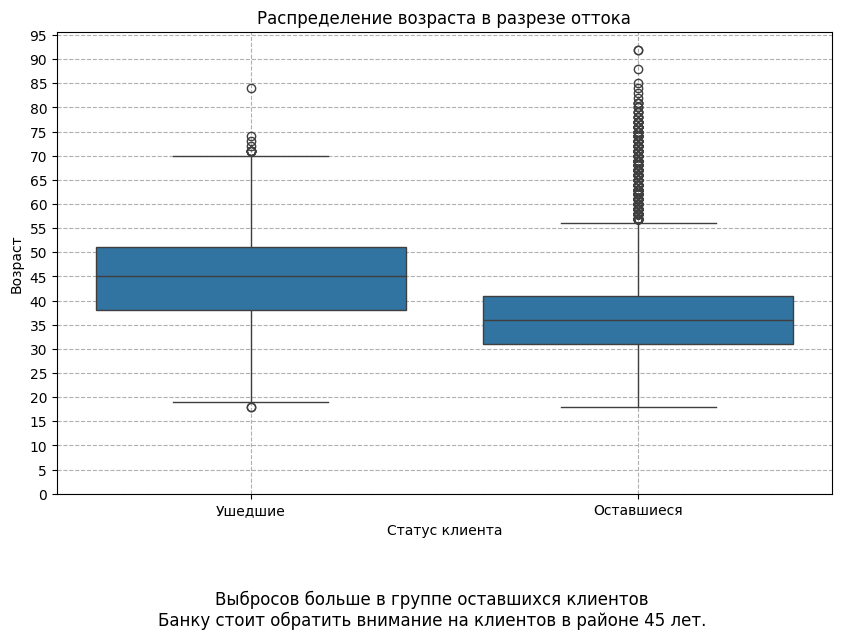

In [6]:
exited = churn_data[churn_data['Exited'] == 1]
not_exited = churn_data[churn_data['Exited'] == 0]

plt.figure(figsize=(10, 6))

sns.boxplot(
    x=churn_data['Exited'].map({0: 'Оставшиеся', 1: 'Ушедшие'}),
    y='Age',
    data=churn_data
)

plt.title('Распределение возраста в разрезе оттока')
plt.yticks(range(0, 100, 5))
plt.xlabel('Статус клиента')
plt.ylabel('Возраст')
plt.grid(linestyle='--')
plt.suptitle(
'''Выбросов больше в группе оставшихся клиентов
Банку стоит обратить внимание на клиентов в районе 45 лет.''',
y=-0.05)

plt.show()


9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

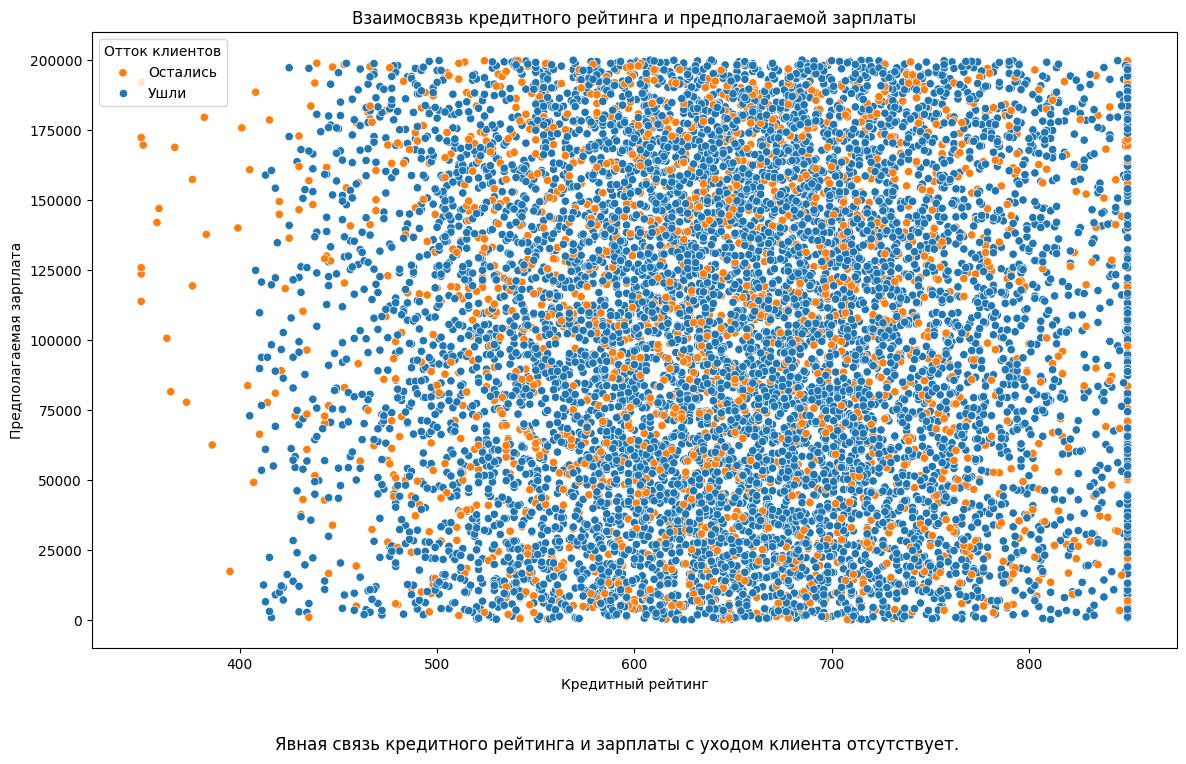

In [7]:
plt.figure(figsize=(14, 8))

sns.scatterplot(data=churn_data, x='CreditScore', y='EstimatedSalary', hue='Exited')

plt.title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая зарплата')
plt.legend(title='Отток клиентов', loc='upper left', labels=['Остались', 'Ушли'])
plt.suptitle(
'''Явная связь кредитного рейтинга и зарплаты с уходом клиента отсутствует.''',
y=0)

plt.show()

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

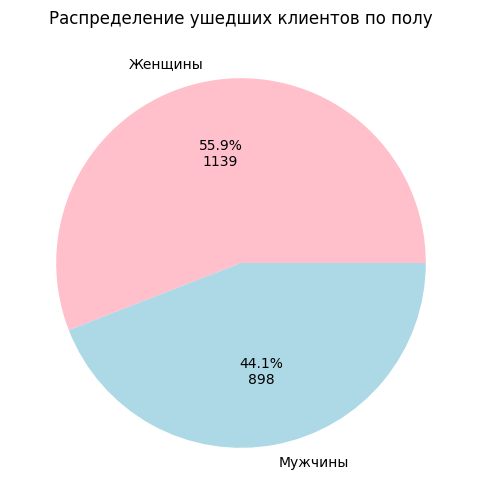

In [8]:
churn_by_gender = churn_data[churn_data['Exited'] == 1].groupby('Gender').size()

plt.figure(figsize=(6, 6))

plt.pie(churn_by_gender,
        labels=['Женщины', 'Мужчины'],
        autopct=lambda x: f'{x:.1f}%\n{churn_by_gender.sum()*x / 100:.0f}',
        colors=['pink', 'lightblue']
)

plt.title('Распределение ушедших клиентов по полу')
plt.show()

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

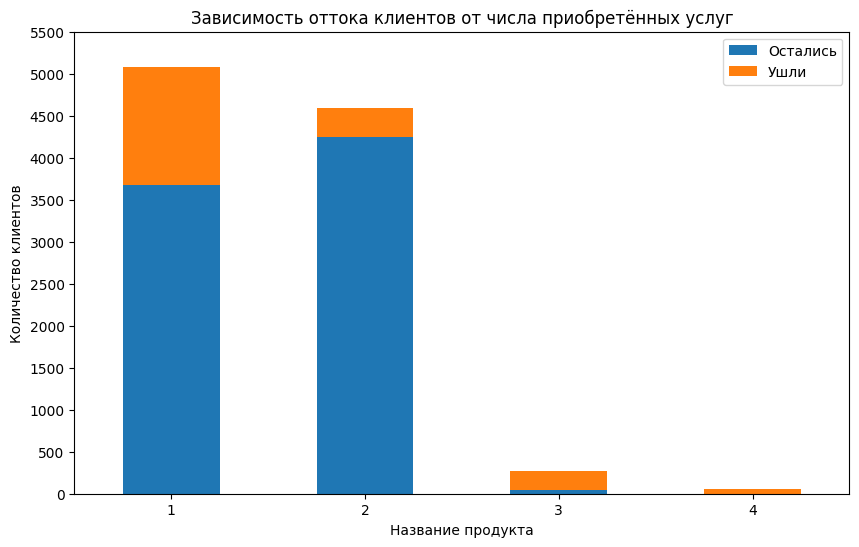

In [9]:
grouped_data = churn_data.groupby(['NumOfProducts', 'Exited']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Зависимость оттока клиентов от числа приобретённых услуг')
plt.xlabel('Название продукта')
plt.ylabel('Количество клиентов')
plt.yticks(range(0, 6000, 500))
plt.xticks(rotation=0)
plt.legend(['Остались', 'Ушли'])
plt.show()

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

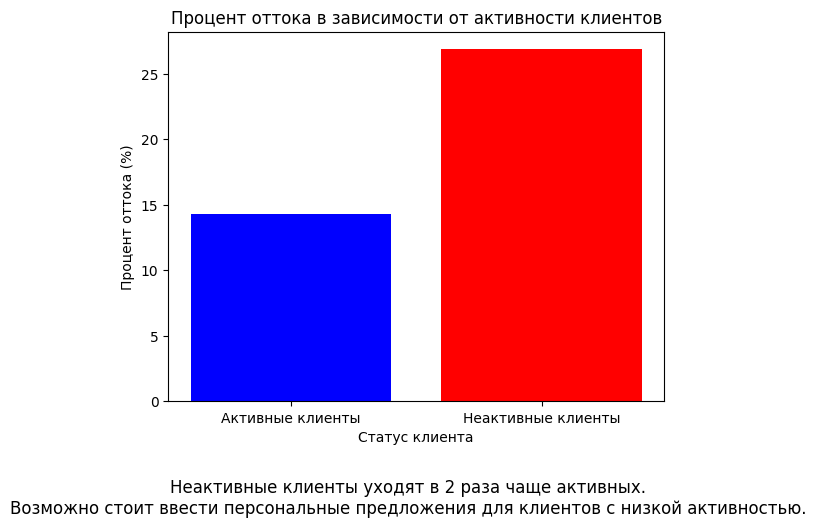

In [10]:
active_customers = churn_data[churn_data['IsActiveMember'] == 1]
inactive_customers = churn_data[churn_data['IsActiveMember'] == 0]

active_churn_rate = active_customers['Exited'].mean()
inactive_churn_rate = inactive_customers['Exited'].mean()

active_churn_rate_rounded = round(active_churn_rate * 100, 2)
inactive_churn_rate_rounded = round(inactive_churn_rate * 100, 2)

plt.bar(['Активные клиенты', 'Неактивные клиенты'],
        [active_churn_rate_rounded, inactive_churn_rate_rounded],
        color=['blue', 'red']
)
plt.ylabel('Процент оттока (%)')
plt.xlabel('Статус клиента')
plt.title('Процент оттока в зависимости от активности клиентов')

plt.suptitle(
'''Неактивные клиенты уходят в 2 раза чаще активных.
Возможно стоит ввести персональные предложения для клиентов с низкой активностью.''',
y=-0.05)

plt.show()

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [11]:
churned_clients = churn_data[churn_data['Exited'] == 1].groupby('Geography').size()
total_clients = churn_data.groupby('Geography').size()

churn_rate = (churned_clients / total_clients) * 100

# Преобразование в DataFrame
churn_rate_df = churn_rate.reset_index()
churn_rate_df.columns = ['Страна', 'Доля ушедших клиентов (%)']

fig = px.choropleth(
    churn_rate_df,
    locations='Страна',  # Названия стран
    locationmode='country names',  # Режим отображения по названиям стран
    color='Доля ушедших клиентов (%)',  # Название столбца с данными
    hover_name='Страна',  # Подсказка при наведени
    color_continuous_scale=px.colors.sequential.Turbo,  # Цветовая схема
    title='Доля ушедших клиентов по странам'
)

max_churn_country = churn_rate.idxmax()
max_churn_rate = churn_rate.max()

fig.add_annotation(
    x=-0.1, y=-0.05,
    showarrow=False,  # Убираем стрелку
    text=f'''Страна с наибольшей долей ушедших клиентов: {max_churn_country} ({max_churn_rate:.2f}%) <br>
    <br>
    Отток клиентов в Германии в несколько раз превышает отток во Франции и Испании <br>
    Возможно причина в недостаточной локализации сервисов банка или <br>
    в качестве обслуживания клиентов''',
)

# Задание размера графика (ширина и высота в пикселях)
fig.update_layout(
    width=900,  # Ширина графика в пикселях
    height=600   # Высота графика в пикселях
)

fig.show()


9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
        
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

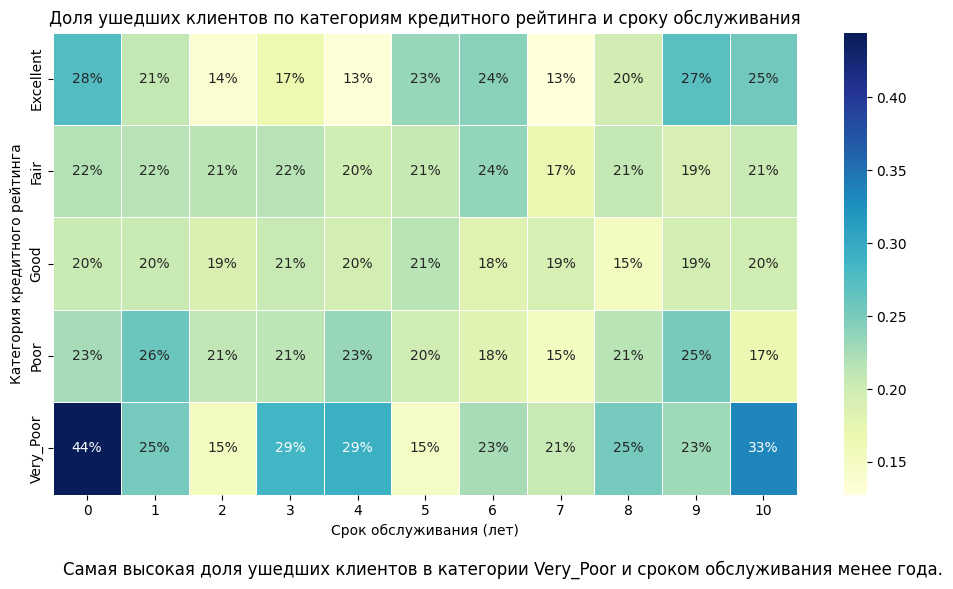

In [12]:
# Функция для кредитного рейтинга из задания 
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    index='CreditScoreCat', 
    columns='Tenure', 
    values='Exited', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))

sns.heatmap(pivot, annot=True, fmt='.0%', cmap='YlGnBu', linewidths=0.5)

plt.title('Доля ушедших клиентов по категориям кредитного рейтинга и сроку обслуживания')
plt.xlabel('Срок обслуживания (лет)')
plt.ylabel('Категория кредитного рейтинга')

plt.suptitle(
'''Самая высокая доля ушедших клиентов в категории Very_Poor и сроком обслуживания менее года.''',
y=0)

plt.show()